<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Analyze-A/B-Test-Results" data-toc-modified-id="Analyze-A/B-Test-Results-1">Analyze A/B Test Results</a></span></li><li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents-2">Table of Contents</a></span><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-2.1">Introduction</a></span></li><li><span><a href="#Part-I---Probability" data-toc-modified-id="Part-I---Probability-2.2">Part I - Probability</a></span></li><li><span><a href="#Part-II---A/B-Test" data-toc-modified-id="Part-II---A/B-Test-2.3">Part II - A/B Test</a></span></li><li><span><a href="#Part-III---A-regression-approach" data-toc-modified-id="Part-III---A-regression-approach-2.4">Part III - A regression approach</a></span></li></ul></li><li><span><a href="#Conclusions" data-toc-modified-id="Conclusions-3">Conclusions</a></span><ul class="toc-item"><li><span><a href="#Gather-Submission-Materials" data-toc-modified-id="Gather-Submission-Materials-3.1">Gather Submission Materials</a></span></li><li><span><a href="#Submit-the-Project" data-toc-modified-id="Submit-the-Project-3.2">Submit the Project</a></span></li></ul></li></ul></div>

## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
### Part I - Probability

To get started, let's import our libraries.

In [248]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [249]:
df=pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [250]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [251]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [252]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [253]:
old_page_disalignment=df.query('group=="treatment" & landing_page=="old_page"')
old_page_disalignment.count()

user_id         1965
timestamp       1965
group           1965
landing_page    1965
converted       1965
dtype: int64

In [254]:
new_page_disalignment=df.query('group=="control" & landing_page=="new_page"')
new_page_disalignment.count()

user_id         1928
timestamp       1928
group           1928
landing_page    1928
converted       1928
dtype: int64

In [255]:
total_disalignment = old_page_disalignment.append(new_page_disalignment)
total_disalignment.count()

user_id         3893
timestamp       3893
group           3893
landing_page    3893
converted       3893
dtype: int64

In [256]:
print("The numnber of times that 'new_page' and 'treatment' don't lineup is {}".format(total_disalignment.user_id.count()))

The numnber of times that 'new_page' and 'treatment' don't lineup is 3893


f. Do any of the rows have missing values?

In [257]:
df[df.isnull().any(axis=1)].count()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

**The misalign data will be removed since we cannot tell to which group they belong. That way we will ensure the data we are using is as reliable as we can.**

In [258]:
df2=df.drop(index=total_disalignment.index) #removing rows that are not in alignment
df2.reset_index(drop=True,inplace=True) #reseting index values and removing previous one.

In [259]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [260]:
df.shape[0] - df2.shape[0] == total_disalignment.user_id.count() #checking that the different of the dataset size is equal to the misaling rows

True

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [261]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [262]:
df2.shape[0]

290585

Since the unique user values is lower than the number of records in the dataset, it indicates a repeated user id.

In [263]:
repeated_user_id=df2[df2.user_id.duplicated()==True].user_id.values[0]
repeated_user_id

773192

In [264]:
print("The repeated user id is {}".format(repeated_user_id))

The repeated user id is 773192


c. What is the row information for the repeat **user_id**? 

In [265]:
df2[df2.user_id==repeated_user_id]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [266]:
#removing the second entry of the user ID (index 2862)
df2.drop(index=df2[df2.user_id==repeated_user_id].index[1],inplace=True) 
df2.reset_index(drop=True, inplace=True) #reseting index values

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [267]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [268]:
df2.query('group=="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [269]:
df2.query('group=="treatment"').converted.mean()

0.11880806551510564

In [270]:
actual_diffs=df2.query('group=="treatment"').converted.mean()-df2.query('group=="control"').converted.mean()
actual_diffs # different calculated as user P_new - P_old

-0.0015782389853555567

d. What is the probability that an individual received the new page?

In [271]:
df2.query('landing_page=="new_page"').converted.count()/df2.converted.count()

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**Based only on the observation above, we cannot tell if there is enough evidence to conclude that the new page leads to more conversions. It seems that the control group has a higher conversion percentage. An A/B test analysis would help us in the decision**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ P_{new} - P_{old}<=0 $$
$$ P_{new} - P_{old}>0 $$ 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [272]:
p_new=df2.converted.mean() # assuming p_new and p_old are the same regarding of the page
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [273]:
p_old=df2.converted.mean() # assuming p_old and p_new are the same regarding of the page
p_old

0.11959708724499628

c. What is $n_{new}$?

In [274]:
n_new=df2.query('group=="treatment"').converted.count()
n_new # number of users that received the new page (treatment group)

145310

d. What is $n_{old}$?

In [275]:
n_old=df2.query('group=="control"').converted.count()
n_old # number of users that received the old page (control group)

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [276]:
#Since the database has a large number of samples, 
#we assume the sample mean will be normally distributed (central limit theorem)
new_page_converted = np.random.binomial(1, p_new, n_new)

In [277]:
new_page_converted.mean()

0.12006744202050788

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [278]:
#Since the database has a large number of samples, 
#we assume the sample mean will be normally distributed (central limit theorem)
old_page_converted = np.random.binomial(1, p_old, n_old)

In [279]:
old_page_converted.mean()

0.12205900574087586

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [280]:
new_page_converted.mean()-old_page_converted.mean()

-0.0019915637203679754

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [281]:
p_diffs=[]
for _ in range(10000):
    new_page_converted = np.random.binomial(1, p_new, n_new)
    old_page_converted = np.random.binomial(1, p_old, n_old)
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

In [282]:
p_diffs = np.array(p_diffs) # converting the list to numpy array

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

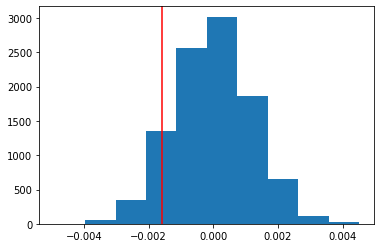

In [283]:
plt.hist(p_diffs);
plt.axvline(actual_diffs,c='r') # red line indicates where the actual difference falls within the histogram

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [284]:
actual_diffs=df2.query('group=="treatment"').converted.mean()-df2.query('group=="control"').converted.mean()
actual_diffs # difference calculated from the dataset used in part 1 (p_new - p_old)

-0.0015782389853555567

In [285]:
(p_diffs>actual_diffs).mean()

0.9061

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**The above value (0.9066) is called p-value; large p-values mean that the different between the two hypothesis is not significant and that we cannot reject the null hypothesis. In our case, we are allowing a maximum type 1 error rate of 5% (p_values<0.05), so parameters with p-values above 0.05 are considered not significant.**

**Based on the observation above, the new page does not affect the user conversion rate.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [286]:
import statsmodels.api as sm

convert_old = df2.query('group=="control"').converted.sum() #number of user converted based on the old page
convert_new = df2.query('group=="treatment"').converted.sum() #number of user converted based on the new page
n_old=df2.query('group=="control"').converted.count()
n_new=df2.query('group=="treatment"').converted.count()

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://www.statsmodels.org/stable/generated/statsmodels.stats.proportion.proportions_ztest.html) is a helpful link on using the built in.

In [287]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger') 
#we set the alternative to be "larger" since our alternative hypothesis indicates that p_new > p_old

In [288]:
z_score

-1.3109241984234394

In [289]:
import scipy.stats as st
st.norm.ppf(1-(0.05/2)) #calculating the critical value based on our alpha (0.05)

1.959963984540054

In [290]:
p_value

0.9050583127590245

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**The Z score is the number of standard deviations that the data lies from the mean (check [this page](https://www.investopedia.com/terms/z/zscore.asp) for more details). For the score to be significant the |z_score| should be greater than the critical value (1.96). The z-score is negative because most of the values are below the mean.**

**The p_value is the same as the one obtain based on our proportion calculations, indicating that we cannot reject the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [291]:
df3=df2 #Creating a new dataset for part III
df3.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [292]:
#creating the dummy variables for the new and old pages
df3[['new_page','old_page']]=pd.get_dummies(df3['landing_page'])

In [293]:
#creating a column to determine if it is the control (0) or treatment (1) group
df3['ab_page']=pd.get_dummies(df3['group']).treatment 
df3.head()

,user_id,timestamp,group,landing_page,converted,new_page,old_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1,0


In [294]:
df3['intercept']=1 #creating the intercept

c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [295]:
log_model=sm.Logit(df3['converted'],df3[['intercept','new_page']])
results=log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [296]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.3502
Date:               2020-04-26 12:44 BIC:              212801.5095
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.18988    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
new_page     -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The new page p-value is 0.1899. The reason why it defers from Part II is that logistic models have different Null hypothesis. In logistic models, the null hypothesis is that "there is no relationship between the converted users and the page used". The p-value base on the model was above 0.05 indicating that the null hypothesis is valid.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Other factor that could affect the conversion rate should be considered to ensure we are not missing any relevant information and to ensure we get useful conclusions.**

**Other parameters that could influence the conversion are:**
<li>country</li>
<li>time of the day</li>
<li>user duration on each page</li>

**Below we will check if the country or  if the time of the date when the user access the page have an impact in the regression model. We will not check the user duration on each page since we do not have that data available.**

**Adding additional terms to the regression model could change the outcome depending on how the variables interact with each other.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [297]:
#loading country data and joining databases
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df3.set_index('user_id'), how='inner')

In [298]:
df_new.head(1)

,country,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1


In [299]:
df_new[['CA','UK','US']]=pd.get_dummies(df_new['country']) #dummy variables are created alphabetically
df_new.tail() # to check iof the dummy variables are assign correctly

,country,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,CA,UK,US
user_id,,,,,,,,,,,,
653118,US,2017-01-09 03:12:31.034796,control,old_page,0,0,1,0,1,0,0,1
878226,UK,2017-01-05 15:02:50.334962,control,old_page,0,0,1,0,1,0,1,0
799368,UK,2017-01-09 18:07:34.253935,control,old_page,0,0,1,0,1,0,1,0
655535,CA,2017-01-09 13:30:47.524512,treatment,new_page,0,1,0,1,1,1,0,0
934996,UK,2017-01-09 00:30:08.377677,control,old_page,0,0,1,0,1,0,1,0


In [300]:
### Fit Your Linear Model And Obtain the Results
log_model_country=sm.Logit(df_new['converted'],df_new[['intercept','UK','US']])
results_country=log_model_country.fit()
results_country.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212780.8333
Date:               2020-04-26 12:44 BIC:              212812.5723
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           2                LL-Null:          -1.0639e+05
Df Residuals:       290581           LLR p-value:      0.19835    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

**Since the p-values are above 0.05, it does not seem that the country has a significant impact on the model**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [301]:
### Fit Your Linear Model And Obtain the Results
log_model_country=sm.Logit(df_new['converted'],df_new[['intercept','new_page','UK','US']])
results_country=log_model_country.fit()
results_country.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212781.1253
Date:               2020-04-26 12:44 BIC:              212823.4439
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           3                LL-Null:          -1.0639e+05
Df Residuals:       290580           LLR p-value:      0.17599    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0300    0.0266  -76.2488  0.0000  -2.0822  -1.9778
new_page      -0.0149    0.0114   -1.3069  0.1912  -0.0374   0.0075
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

**The p-values did not change much by combining the country with the page used.**

**Now let's check if the time of the day has an impact on the model**

In [302]:
#converting timestamp from string to datetime object
df_new['timestamp']=pd.to_datetime(df_new.timestamp) 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 834778 to 934996
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   country       290584 non-null  object        
 1   timestamp     290584 non-null  datetime64[ns]
 2   group         290584 non-null  object        
 3   landing_page  290584 non-null  object        
 4   converted     290584 non-null  int64         
 5   new_page      290584 non-null  uint8         
 6   old_page      290584 non-null  uint8         
 7   ab_page       290584 non-null  uint8         
 8   intercept     290584 non-null  int64         
 9   CA            290584 non-null  uint8         
 10  UK            290584 non-null  uint8         
 11  US            290584 non-null  uint8         
dtypes: datetime64[ns](1), int64(2), object(3), uint8(6)
memory usage: 17.2+ MB


In [303]:
#checking the overall interval of the test (in days)
duration=(df_new['timestamp'].max()-df_new['timestamp'].min())
duration/np.timedelta64(1, 'D')
days

21.0

The AB test was conducted for 21 days. Now let's add two columns, one with the day accessed and another with the hour accessed.

In [304]:
df_new['hour']=df_new['timestamp'].dt.hour
df_new['day']=df_new['timestamp'].dt.day
df_new.head()

,country,timestamp,group,landing_page,converted,new_page,old_page,ab_page,intercept,CA,UK,US,hour,day
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,0,1,0,1,0,23,14
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,0,1,1,0,0,1,14,23
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,0,1,1,0,1,0,14,16
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,0,1,0,1,0,3,22
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,0,1,1,0,1,0,13,16


In [305]:
### Linear Model with the previous parameter, incluing the day and the hour
log_model_d_h=sm.Logit(df_new['converted'],df_new[['intercept','new_page','UK','US','day','hour']])
results_d_h=log_model_d_h.fit()
results_d_h.summary2()

Optimization terminated successfully.
         Current function value: 0.366096
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212775.3232
Date:               2020-04-26 12:44 BIC:              212838.8011
No. Observations:   290584           Log-Likelihood:   -1.0638e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290578           LLR p-value:      0.011507   
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0757    0.0309  -67.2006  0.0000  -2.1362  -2.0152
new_page      -0.0149    0.0114   -1.3021  0.1929  -0.0373   0.0075
UK             0.0506    0.0284    1.7829  0.0746  -0.0050   0.1063
US             0.0406    0.0269    1.5085  0.1314  -0.0121   0.0932
day            0.0015    0.0009    1.6369  0.1016  -0.0003   0.0032
hour           0.0023    0.0008    2.7708  0.0056   0.0007   0.0039
==================================================================

"""

The p-value for "hour" is below 0.05 indicating that it is a significant parameter. Based on the coefficient we can conclude that:

In [306]:
np.exp(0.0023)

1.002302647029

For every one hour increase, an user is 1.0023 times more likely to be converted. Based on this, it seems that the users tend to be converted usually towards the end of the day. It is important to keep in mind that **correlation does not imply causation**. There are other factors not considered in this study that could have influence the regression.

Now, let's check the model fit if we only use the hour as the parameter

In [307]:
### Linear Model with "hour" only
log_model_hour=sm.Logit(df_new['converted'],df_new[['intercept','hour']])
results_hour=log_model_hour.fit()
results_hour.summary2()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212774.9405
Date:               2020-04-26 12:44 BIC:              212796.0998
No. Observations:   290584           Log-Likelihood:   -1.0639e+05
Df Model:           1                LL-Null:          -1.0639e+05
Df Residuals:       290582           LLR p-value:      0.0075881  
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0217    0.0112  -181.3116  0.0000  -2.0436  -1.9999
hour          0.0022    0.0008     2.6698  0.0076   0.0006   0.0038
==================================================================

"""

The p-value for the hour is below 0.05, indicating that it is significant. With the hour alone, the p_value is slightly higher (0.0076 vs 0.0056) and the coefficient changed from 0.0023 to 0.0022.

In [308]:
np.exp(0.0022)

1.0022024217756431

Base on the hour, we can conclude that for every one hour increase, an user is 1.0022 times more likely to be converted. It is important to keep in mind that **correlation does not imply causation**. There are other factors not considered in this study that could have influence the regression.

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.